In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from tensorflow.keras import utils
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from scikeras.wrappers import KerasClassifier

In [3]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [4]:
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()

In [5]:
labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Sweater',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandals',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

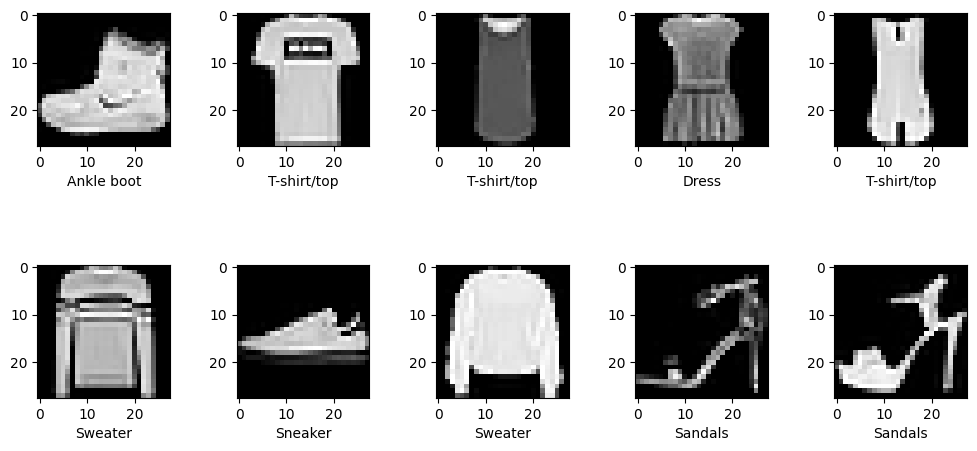

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5) 

for i in range(5):
    image = data_train[i]
    label = labels_dict[labels_train[i]]
    ax = axes[0][i]
    ax.imshow(image, cmap='gray')
    ax.set_xlabel(label)
    
for i in range(5, 10):
    image = data_train[i]
    label = labels_dict[labels_train[i]]
    ax = axes[1][i - 5] 
    ax.imshow(image, cmap='gray')
    ax.set_xlabel(label)
    
plt.show()

In [7]:
normalized_data_train = data_train / 255
normalized_data_test = data_test / 255

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [20]:
optimizer = SGD(learning_rate=0.1)

In [21]:
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [28]:
model.fit(normalized_data_train, labels_train, epochs=50, batch_size=500, validation_split=0.2, verbose=1)

Epoch 1/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2915 - accuracy: 0.8949 - val_loss: 0.3286 - val_accuracy: 0.8822
Epoch 2/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2882 - accuracy: 0.8945 - val_loss: 0.3290 - val_accuracy: 0.8842
Epoch 3/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2836 - accuracy: 0.8969 - val_loss: 0.3405 - val_accuracy: 0.8790
Epoch 4/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2835 - accuracy: 0.8967 - val_loss: 0.3778 - val_accuracy: 0.8595
Epoch 5/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2779 - accuracy: 0.8985 - val_loss: 0.3218 - val_accuracy: 0.8851
Epoch 6/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2770 - accuracy: 0.9004 - val_loss: 0.3204 - val_accuracy: 0.8856
Epoch 7/50
96/96 [==============================] - 1s 8ms/step - loss: 0.2690 - accuracy: 0.9021 - val_loss: 0.3190 - val_accuracy: 0.8851
Epoch 8/50
96/96 [==

In [29]:
results = model.evaluate(normalized_data_test, labels_test)
print(results)

313/313 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8839
[0.3288559913635254, 0.883899986743927]


In [30]:
model.predict(np.array([normalized_data_test[0]]))

1/1 [==============================] - 0s 57ms/step


array([[4.2852398e-07, 9.8272426e-07, 3.2964720e-06, 1.2507666e-06,
        4.3219711e-06, 1.0740354e-03, 1.6324541e-06, 4.9043898e-03,
        1.5099885e-05, 9.9399465e-01]], dtype=float32)

1/1 [==============================] - 0s 14ms/step


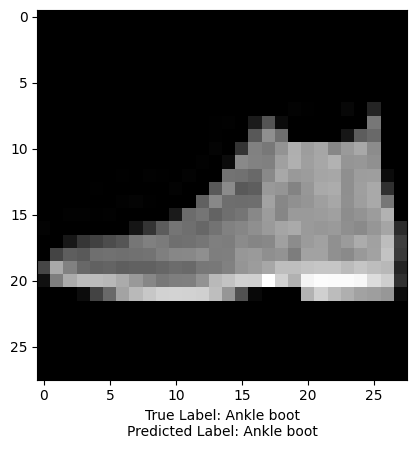

1/1 [==============================] - 0s 14ms/step


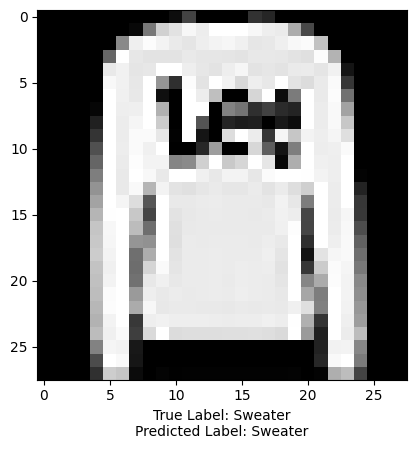

1/1 [==============================] - 0s 15ms/step


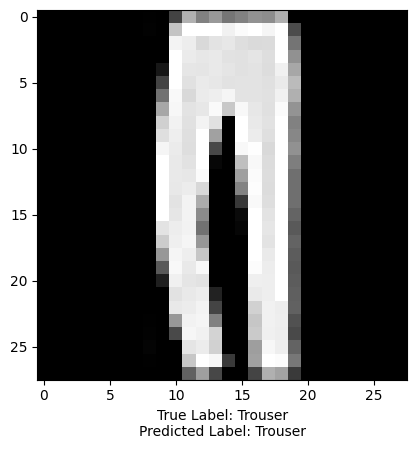

1/1 [==============================] - 0s 15ms/step


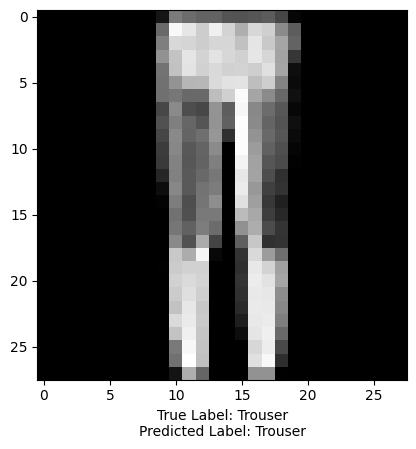

1/1 [==============================] - 0s 13ms/step


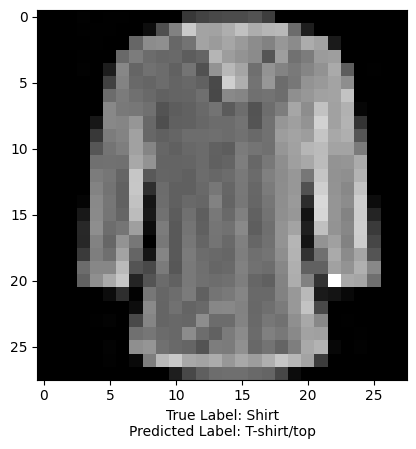

1/1 [==============================] - 0s 15ms/step


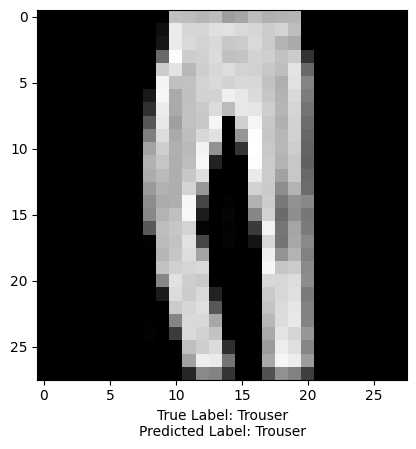

1/1 [==============================] - 0s 15ms/step


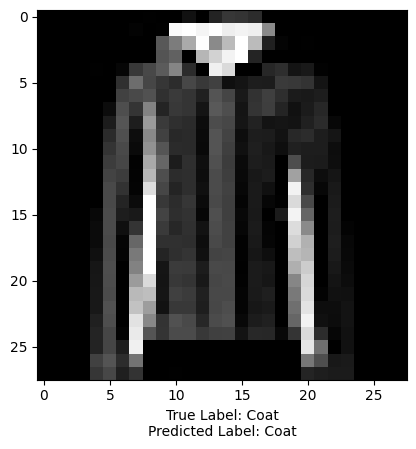

1/1 [==============================] - 0s 15ms/step


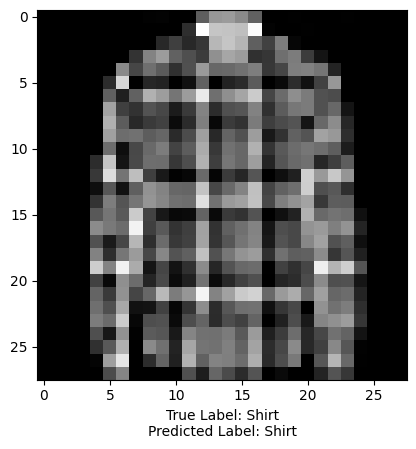

1/1 [==============================] - 0s 14ms/step


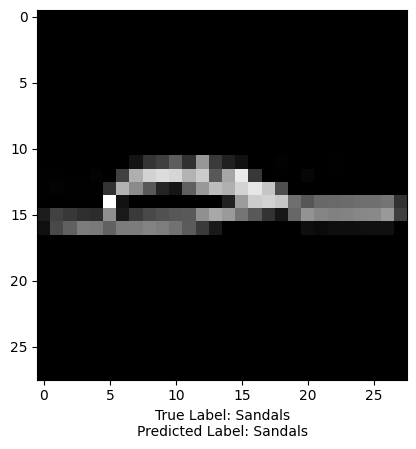

1/1 [==============================] - 0s 15ms/step


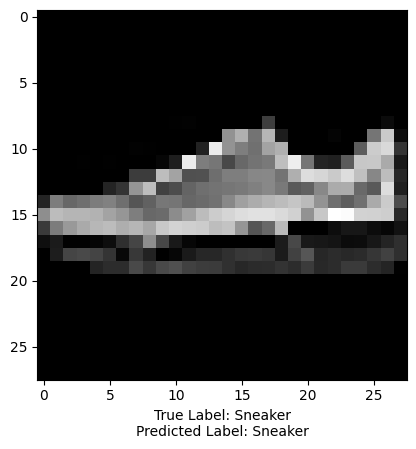

1/1 [==============================] - 0s 15ms/step


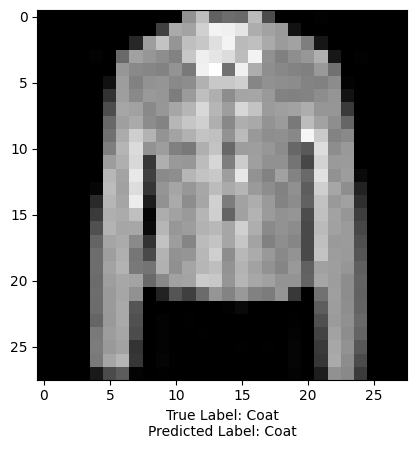

1/1 [==============================] - 0s 14ms/step


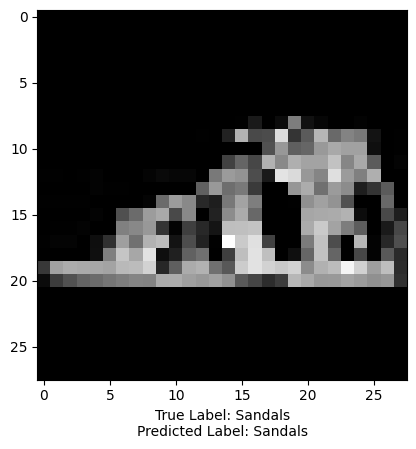

1/1 [==============================] - 0s 16ms/step


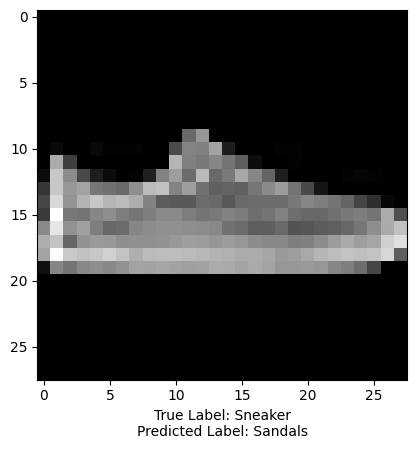

1/1 [==============================] - 0s 15ms/step


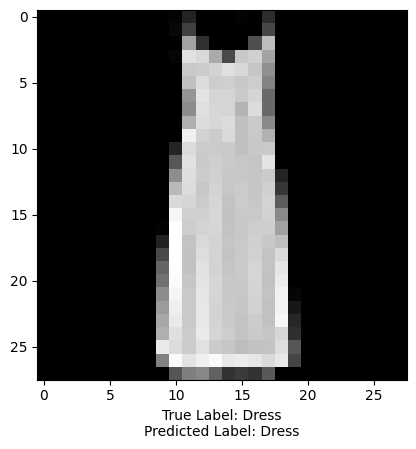

1/1 [==============================] - 0s 15ms/step


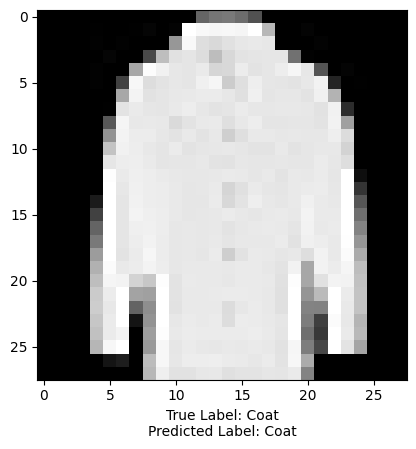

1/1 [==============================] - 0s 15ms/step


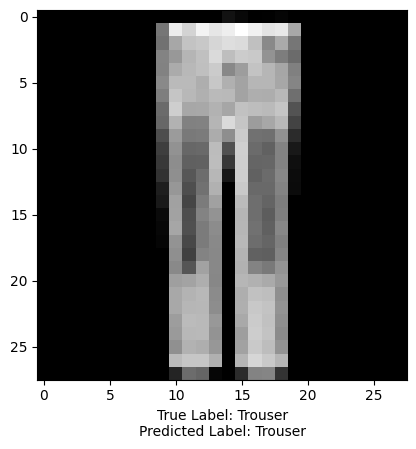

1/1 [==============================] - 0s 15ms/step


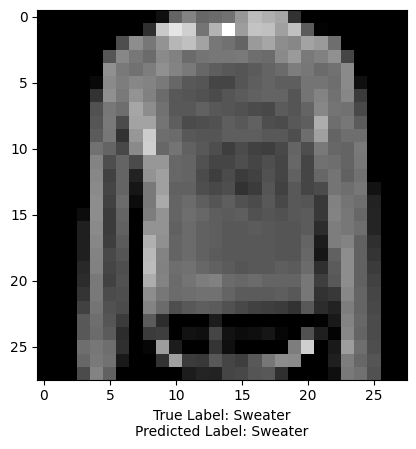

1/1 [==============================] - 0s 15ms/step


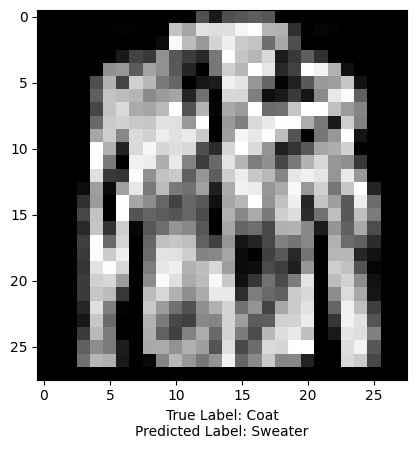

1/1 [==============================] - 0s 15ms/step


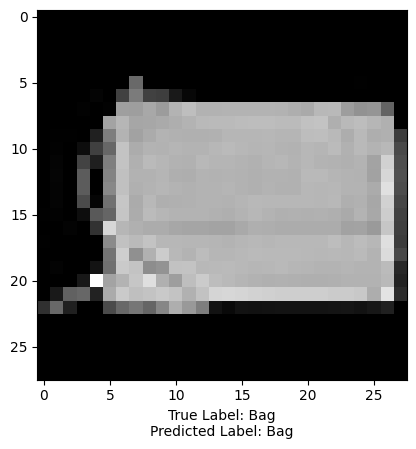

1/1 [==============================] - 0s 15ms/step


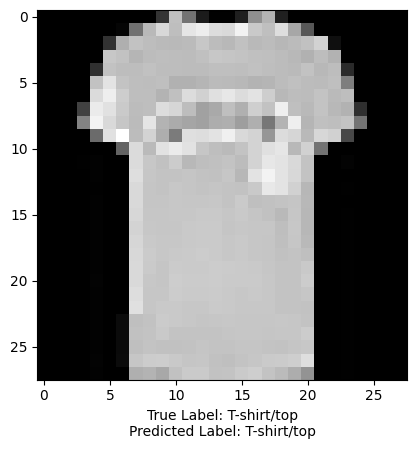

In [31]:
for i in range(20):
    prediction = np.argmax(model.predict(np.array([normalized_data_test[i]])))
    image = data_test[i]
    label = labels_dict[labels_test[i]]
    prediction_label = labels_dict[prediction]
    plt.imshow(image, cmap='gray')
    plt.xlabel(f"True Label: {label}\nPredicted Label: {prediction_label}")
    plt.show()